In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [91]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')
X = data[:,:3]
y = data[:,3]

## GD optimization

In [139]:
def plot_loss(loss):
  plt.plot(loss,marker='*')
  plt.ylabel('Loss'); plt.xlabel("# of epochs")
  plt.show()

In [141]:
def plot_thetaloss(X,loss,theta,learning_rate):
  for i in range(X.shape[1]):  
    plt.plot(theta[:,i],loss,marker="*")
    plt.title('Learning rate {}'.format(learning_rate))
    plt.ylabel('Loss')
    plt.xlabel('theta {}'.format(i))
    plt.show()

In [124]:
def gradient_descent(X,y,batch_size=len(X),optimizer = 'adam',learning_rate=1e-3,beta1=0.1,beta=0.9,n_epochs=200,epsilon = 1e-8):
  bias_col = np.ones((len(X),1))

  try:
    X = np.concatenate((bias_col, X), axis=1)
  except:
    X = np.concatenate((bias_col, X.reshape(-1,1)), axis=1)

  n = float(len(y))

  minima = 1e-3;
  n_feat = X.shape[1]
  thetas = np.array([0]*n_feat); momentum = np.array([0]*n_feat); velocity = np.array([0]*n_feat); sq_grad_avg =  np.array([0]*n_feat)
  theta_updates = np.array([0]*n_feat)
  
  h_values= []
  losses = []
  losses.append(np.linalg.norm(X@thetas-y)**2 / (2*n)) # First error calculation
  
  for i in range(n_epochs):

    print(y)
    print("****************** Iteration", i," ********************")
    for k in range(0,int(n),batch_size):
      if k+batch_size > n:
        last_elem = int(n)
      else:
        last_elem = k+batch_size
      X_batch, y_batch = X[k:last_elem],y[k:last_elem]

      h = X_batch@thetas
  
      error_vec = (h-y_batch)
      j_theta = np.linalg.norm(error_vec)**2 / (2*batch_size)

      grad_vec  = (error_vec@X_batch)  / (batch_size)

      if optimizer =='adam':
        momentum = (beta1 * momentum) + ((1.0 - beta1) * grad_vec)
        velocity = (beta * velocity) + ((1.0 - beta) * pow(grad_vec,2))

        mhat = momentum / (1.0 - beta1**(i+1))
        vhat = velocity / (1.0 - beta**(i+1))

        update = learning_rate / (pow(vhat,0.5) + epsilon) *mhat
      
      elif optimizer == 'rms_prop':
        sq_grad_sums = np.linalg.norm(grad_vec)
        sq_grad_avg = (sq_grad_avg * beta) + (sq_grad_sums * (1.0-beta))

        alpha = learning_rate / (epsilon + sq_grad_sums)

        update = alpha * grad_vec
      
      elif optimizer == 'ada_grad':
        sq_grad_sums = np.linalg.norm(grad_vec)

        alpha = learning_rate / (epsilon + sq_grad_sums)

        update = alpha * grad_vec

      elif optimizer == 'momentum':
        momentum = (beta * momentum) + (learning_rate * grad_vec)

        update = momentum  

      elif optimizer == 'nag':
        momentum = (beta * momentum) + (learning_rate * grad_vec)

        update = momentum
        thetas = thetas - update

      thetas = thetas - update 
  
    h = X@thetas
    error_vec = h-y
    j_theta = np.linalg.norm(error_vec)**2 / (2*batch_size)
    grad_norm = np.linalg.norm(grad_vec)
  
    print("j = ",j_theta)
    print("Gradient Vector Norm: \n",grad_norm)

    theta_updates = np.vstack([theta_updates, list(thetas)])
  
    j_theta = np.linalg.norm(error_vec)**2 / (2*n)
    losses.append(j_theta)

    if losses[-2] - losses[-1] <= minima:
      print("****************** Training Report ********************")
      print("Result saved at ",i," iterations")

      print("h(x) = y_predict:\n",list(h))
      print("y_actual:\n",list(y))
      h_values.append(h) ## append best values
    
    if j_theta == np.inf:
      print("Model failed to converge, process is terminated")
      return h,losses,theta_updates

  if len(h_values) !=0:
    h = h_values[-1]
  
  print("R2 score of the model :",r2_score(h,y))
  return h,losses,theta_updates

In [132]:
h,losses,theta_updates = gradient_descent(X,y,optimizer='adam',batch_size = 4,learning_rate=1e-3,beta1=0.05,beta=0.7,n_epochs = 200)

[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 0  ********************
j =  82658.48328175809
Gradient Vector Norm: 
 7821.221892548602
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 1  ********************
j =  81482.85757941444
Gradient Vector Norm: 
 7766.09462249154
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 2  ********************
j =  80176.15136873133
Gradient Vector Norm: 
 7704.157838954303
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 3  ********************
j =  78784.34958437346
Gradient Vector Norm: 
 7637.432861642071
[152. 185. 180. 1

In [133]:
h,losses,theta_updates = gradient_descent(X,y,optimizer = 'rms_prop',
                                          batch_size=1,learning_rate=0.05,beta=0.9,n_epochs = 500) # Stochastic gradient descent

[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 0  ********************
j =  247.2821309728107
Gradient Vector Norm: 
 1939.390718582103
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 1  ********************
j =  359.0587812028228
Gradient Vector Norm: 
 600.1910220226373
****************** Training Report ********************
Result saved at  1  iterations
h(x) = y_predict:
 [157.8494358730407, 189.6346398792453, 186.89277938375028, 203.55847666049982, 144.59120544643304, 106.61931978082299, 152.4218225662361, 113.07029526900222, 177.229383337414, 164.1899701297348, 146.8063981950806, 144.72335236081994, 193.06587765633083, 160.46254530085508, 153.11164338204802, 192.45977483257568, 152.77086678885135, 182.95229662756986, 184.07104027712614, 164.71235496143314, 178.7199

In [134]:
h,losses,theta_updates = gradient_descent(X,y,optimizer = 'ada_grad',batch_size=16,learning_rate=0.05,n_epochs = 100)

[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 0  ********************
j =  17519.35577981662
Gradient Vector Norm: 
 13413.477747282492
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 1  ********************
j =  14398.025654920217
Gradient Vector Norm: 
 12220.463480952243
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 2  ********************
j =  11582.853419648762
Gradient Vector Norm: 
 11027.449928868733
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 3  ********************
j =  9073.839126274537
Gradient Vector Norm: 
 9834.437270075321
[152. 185. 

In [135]:
h,losses,theta_updates = gradient_descent(X,y,optimizer = 'momentum',
                                          learning_rate=5e-5,beta=0.85,n_epochs = 100) # only performs well with very small values of alpha

[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 0  ********************
j =  11.30405651029007
Gradient Vector Norm: 
 22917.5459892197
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 1  ********************
j =  9292.519084130061
Gradient Vector Norm: 
 461.4693026390437
****************** Training Report ********************
Result saved at  1  iterations
h(x) = y_predict:
 [282.06117086327197, 339.01778430964, 334.03622821504797, 363.79415483367995, 258.55508499863197, 190.628033915272, 272.3158942322, 201.88278834821597, 316.84181621845596, 293.480575864056, 262.360704066056, 258.697243396608, 345.102287383528, 286.876663177016, 273.568921632512, 344.02593289936794, 273.21020157568, 326.80634162064797, 329.004174242448, 294.38025743206396, 319.33330087225596, 318.0470

In [136]:
h,losses,theta_updates = gradient_descent(X,y,optimizer = 'nag',
                                          learning_rate=5e-5,beta=0.9,n_epochs = 100)

[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 0  ********************
j =  12348.66764284116
Gradient Vector Norm: 
 22917.5459892197
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 1  ********************
j =  9521.091881548426
Gradient Vector Norm: 
 21994.845658716476
[152. 185. 180. 196. 142. 101. 149. 115. 175. 164. 141. 141. 184. 152.
 148. 192. 147. 183. 177. 159. 177. 175. 175. 149. 192.]
****************** Iteration 2  ********************
j =  11202.752987188234
Gradient Vector Norm: 
 19311.858615868387
****************** Training Report ********************
Result saved at  2  iterations
h(x) = y_predict:
 [13.20389928182465, 15.892684846814848, 15.6463837828023, 17.054499729469114, 12.114544461618532, 8.956439323190555, 12.780901728806782, 9.495297423634604

## Plotting Results

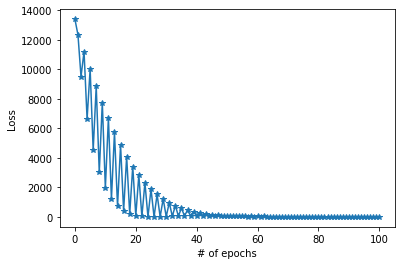

In [140]:
plot_loss(losses)
## Loss fluctuates due to the accelerated steps taken by the nag algorithm

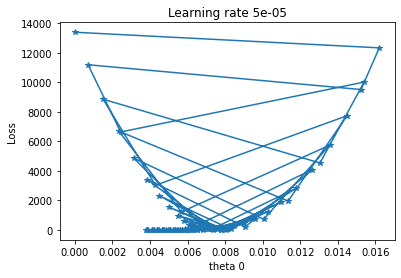

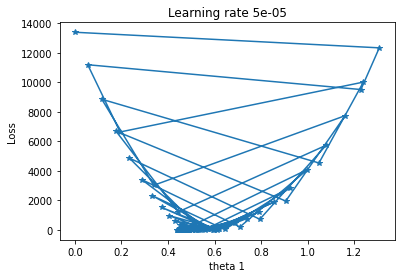

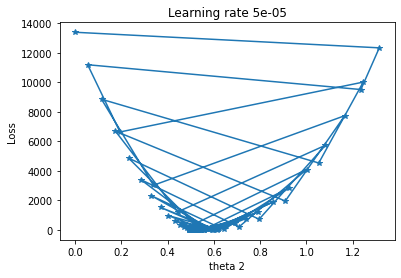

In [143]:
plot_thetaloss(X,losses,theta_updates,5e-5)